In [1]:
1 + 1

2

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [10]:
from my_tools import *

In [11]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [90]:
BTC.getUnspents()

Work time 259.52s


In [91]:
BTC[S_UNSPENTS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_unspents_par" file


In [5]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC[S_UNSPENTS].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_unspents'...
  Got 'int1000b_unspents_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with

In [6]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'WOnuldata', S_REL_FLOWS:'nonPar', S_FEES:'nonPar', S_UNSPENTS:'par'})
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'relativeFlowVolumes=nonPar_ginisOfClustersWealth=WOnuldata_fees=nonPar_unspents=par_NacamotoCoefs='


/home/ubuntu/thesis_work/my_tools.py:344: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


In [7]:
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

There is already relativeFlowVolumes=nonPar_ginisOfClustersWealth=WOnuldata_fees=nonPar_unspents=par_NacamotoCoefs=_rolledMeanComWnd=5 version of data, stop


/home/ubuntu/thesis_work/my_tools.py:344: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


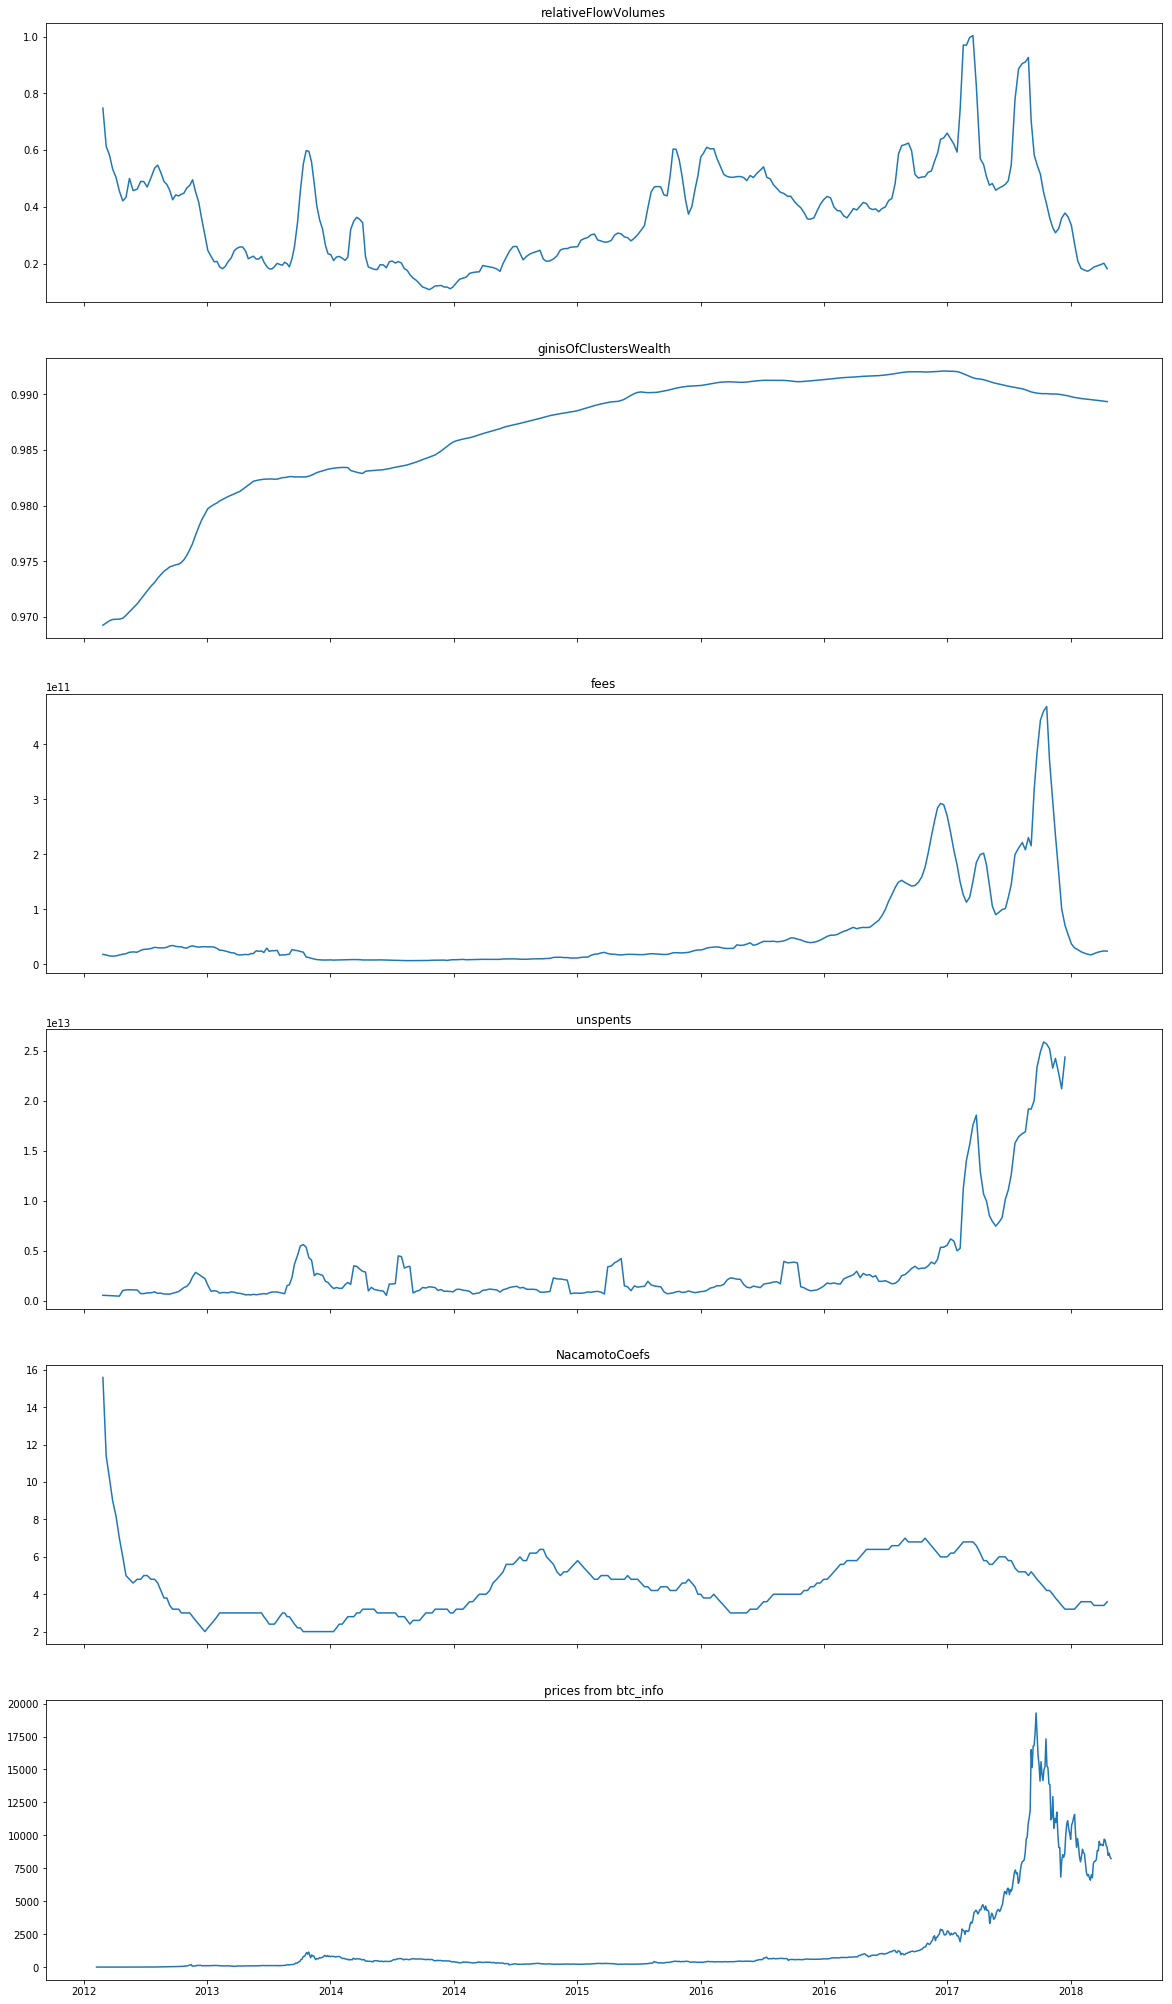

In [8]:
_ = BTC.drawGraph(allMetrics_tag=tag_filtered_b, price_key='btc_info', begin=200)

In [119]:
_.savefig('bitecoin_win5.png')

In [142]:
unspent_np = np.array(BTC[S_UNSPENTS]['par'])
unspent_np[unspent_np == None] = np.nan

In [150]:

unspent_on_flow = unspent_np /  np.array(BTC[S_FLOWS_INCOMES]['nonPar']['incomes'])

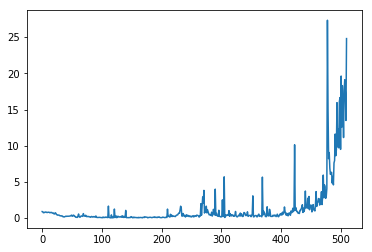

In [151]:
plt.plot(unspent_on_flow)

In [135]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


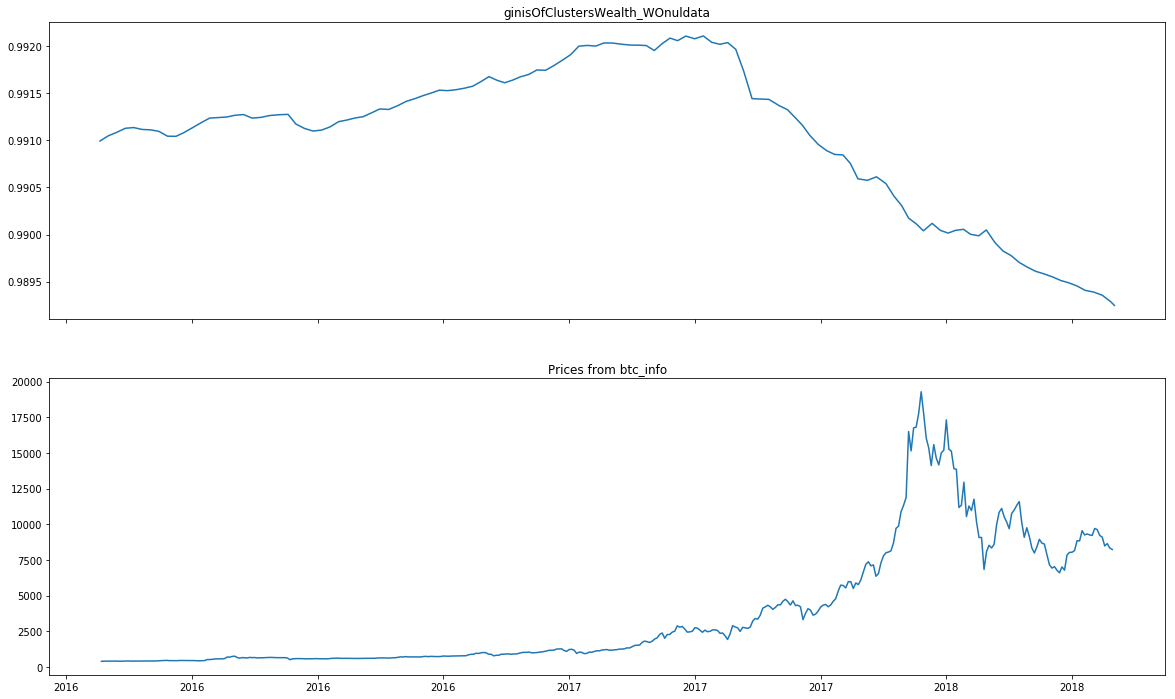

In [122]:
_ = BTC.drawGraph({S_GINIS: 'WOnuldata'}, price_key='btc_info', begin=400)
#_ = BTC.drawGraph({}, price_key='btc_info')

In [16]:
# Q_N
BTC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [20]:
BTC.getNonEmptyClustersCounts('nonPar')

Work time 9297.75s


In [21]:
BTC[S_NONEMPTY_CLS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_nonEmptyClustersCounts_nonPar" file


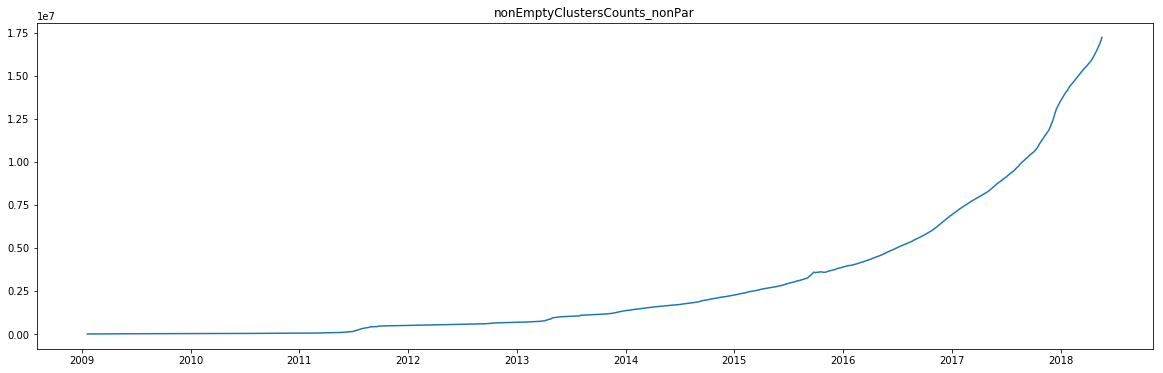

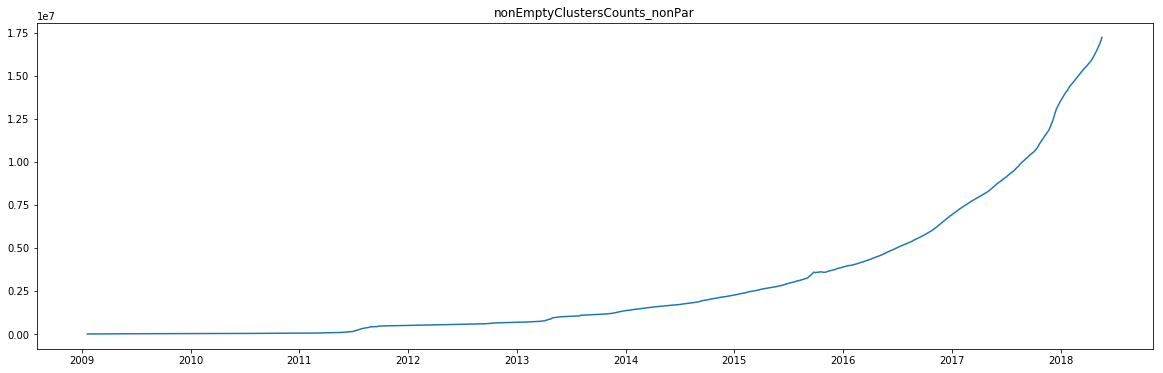

In [22]:
BTC.drawGraph({S_NONEMPTY_CLS: 'nonPar'})

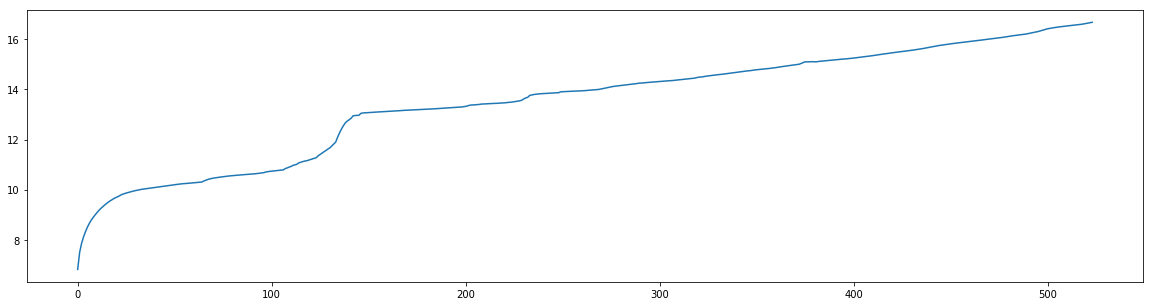

In [23]:
plt.figure(figsize=(20,5))
plt.plot(np.log(np.array(BTC[S_NONEMPTY_CLS]['nonPar'])))

In [120]:
import pandas as pd
prices_b_df = pd.read_csv('~/thesis_work/downloaded/market-price.csv')
#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]
#prices_m_df[:3]

prices_b_df['2009-01-03 00:00:00'][:3]

0    2009-01-05 00:00:00
1    2009-01-07 00:00:00
2    2009-01-09 00:00:00
Name: 2009-01-03 00:00:00, dtype: object

In [121]:

#prices_half_m_df = prices_m_df[pd.to_datetime(prices_m_df['snapped_at']) <= times[-1]]

In [10]:
#prices_b_df_cut = prices_b_df[prices_b_df.]
prices_b_df_cut = prices_b_df[pd.to_datetime(prices_b_df['2009-01-03 00:00:00']) <= BTC.times[-1]]


In [12]:
len(prices_b_df)

1723

In [13]:
prices_b_df_cut[-3:]

,2009-01-03 00:00:00,0.0
1708,2018-05-14 00:00:00,8652.038333
1709,2018-05-16 00:00:00,8340.703333
1710,2018-05-18 00:00:00,8240.055000


In [15]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_b_df_cut['2009-01-03 00:00:00']),
                            'prices': prices_b_df_cut['0.0']}

In [72]:
BTC.prices.add('btc_info', prices_b_df_to_save)

In [74]:
del BTC.prices.v['btc_info']

In [22]:
BTC.prices['btc_info'].columns

Index(['prices', 'times'], dtype='object')

In [73]:
BTC.prices.save('btc_info', check=False)

Saving "btc_info" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_prices_btc_info" file


In [75]:
BTC.prices.read('btc_info')

In [82]:
BTC.prices['btc_info']['times'][:2]# == prices_b_df_to_save['times']

0    2009-01-05
1    2009-01-07
Name: times, dtype: object

In [81]:
prices_b_df_to_save['times'][:2]

0   2009-01-05
1   2009-01-07
Name: times, dtype: datetime64[ns]

In [59]:
saveCSV(prices_b_df_to_save, 'kutakbash.csv')

In [60]:
betek = readCSV('kutakbash.csv')
betek[:2]

,prices,times
0,0.0,2009-01-05
1,0.0,2009-01-07


In [38]:
saveCSV(betek, 'kutakbash2.csv', index=False)

TypeError: saveCSV() got an unexpected keyword argument 'index'

In [51]:
betek.to_csv('kutakbash2.csv', index=False)

In [52]:
betek = readCSV('kutakbash2')
betek[:2]

,Unnamed: 0,prices,times
0,0,0.0,2009-01-05
1,1,0.0,2009-01-07


In [57]:
BTC.getFees('nonPar')

Work time 61.37s


In [58]:
BTC[S_FEES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_fees_nonPar" file


In [59]:
BTC.getRevenues()

Work time 1.59s


In [61]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


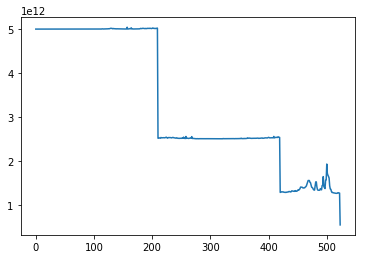

In [63]:
plt.plot(BTC[S_FLOWS_INCOMES]['nonPar_WOFee']['incomes'])

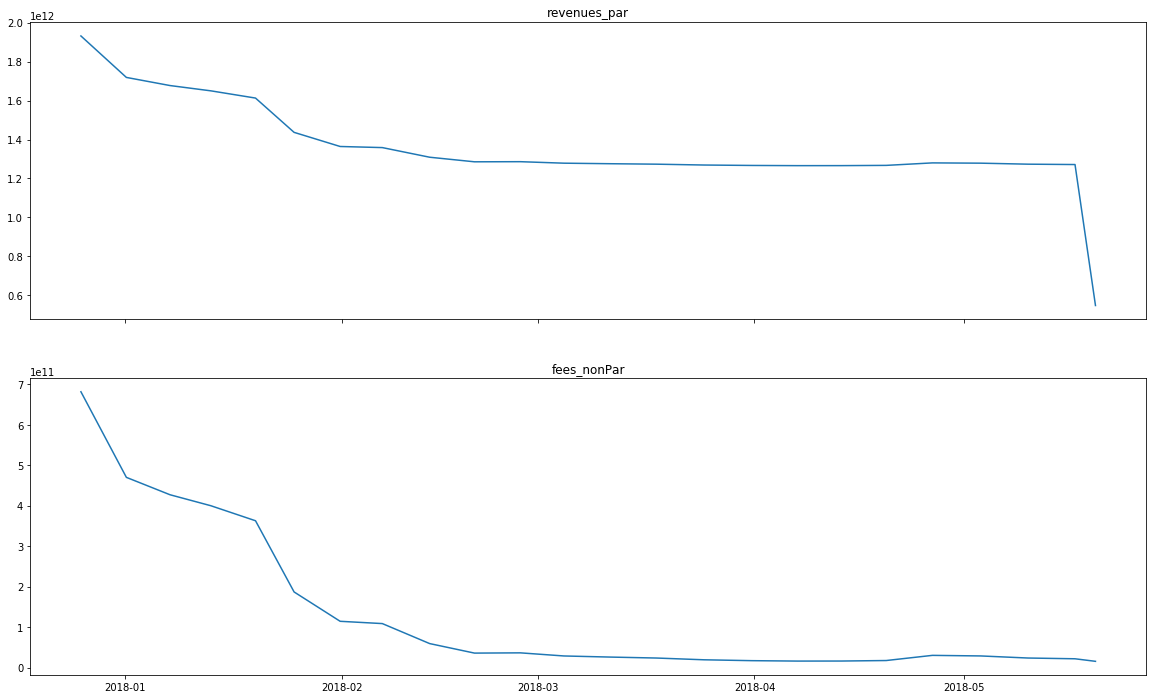

In [67]:
_ = BTC.drawGraph({S_REVENUES:'par', S_FEES:'nonPar'}, begin=500)

In [69]:
%time flowSum_b = checkFlowSum2(BTC.blocks[:500000])

CPU times: user 57min 49s, sys: 0 ns, total: 57min 49s
Wall time: 57min 49s


In [70]:
flowSum_b

0

In [11]:
BTC.chain[200000].fee

63517500

In [12]:
BTC.chain[200000].revenue

5063517500

In [14]:
BTC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [6]:
BTC.getFlowAndIncomeVolume('nonPar')

Work time 11095.46s


In [17]:
# After fix
BTC.getFlowAndIncomeVolume('nonPar')

Work time 9001.3s


In [18]:
BTC[S_FLOWS_INCOMES].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_flowAndIncomeVolumes_nonPar" file


In [22]:
BTC[S_FLOWS_INCOMES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_flowAndIncomeVolumes'...
  Got 'int1000b_flowAndIncomeVolumes_nonPar.json', key is 'nonPar'
There is already nonPar version of data, stop
  Got 'int1000b_flowAndIncomeVolumes_nonPar_WOFee.json', key is 'nonPar_WOFee'
Finish


In [25]:
len(BTC[S_FLOWS_INCOMES]['nonPar']['incomes')# == BTC[S_FLOWS_INCOMES]['nonPar_WOFee']

2

In [20]:
BTC.getRelativeFlowVolumes('nonPar')

Work time 0.0s


In [28]:
BTC[S_REL_FLOWS].save('nonPar')

Saving "nonPar" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_relativeFlowVolumes_nonPar" file


In [3]:
BTC[S_NCS].readAll()
BTC[S_ADDS_CNTS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
